# Bag of Words ----- BOW

In [3]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score



In [4]:
# Load the dataset
message = pd.read_csv('SMSSpamCollection', sep='\t', header=None, names=['label', 'message'])

In [5]:
message

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [6]:
## data cleaning and preprocessing

import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\aryan\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
import re

from nltk.corpus import stopwords

from nltk.stem import PorterStemmer

In [8]:
ps = PorterStemmer()

# RE" can refer to two distinct concepts: Regular Expressions and Regularization. 

# lemmatization here

In [9]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

In [10]:
corpus =[]
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['message'][i])
    review = review.lower()
    review = review.split()
    review = [lemmatizer.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [11]:
corpus

['go jurong point crazy available bugis n great world la e buffet cine got amore wat',
 'ok lar joking wif u oni',
 'free entry wkly comp win fa cup final tkts st may text fa receive entry question std txt rate c apply',
 'u dun say early hor u c already say',
 'nah think go usf life around though',
 'freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv',
 'even brother like speak treat like aid patent',
 'per request melle melle oru minnaminunginte nurungu vettam set callertune caller press copy friend callertune',
 'winner valued network customer selected receivea prize reward claim call claim code kl valid hour',
 'mobile month u r entitled update latest colour mobile camera free call mobile update co free',
 'gonna home soon want talk stuff anymore tonight k cried enough today',
 'six chance win cash pound txt csh send cost p day day tsandcs apply reply hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw'

#  porterStemming here

In [12]:
corpus =[]
for i in range(0, len(message)):
    review = re.sub('[^a-zA-Z]', ' ', message['message'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [13]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

# create the bag -- bag of words

In [14]:
from sklearn.feature_extraction.text import CountVectorizer

# for binary BOW enable binary=True
cv = CountVectorizer(max_features=2500 , binary=True , ngram_range=(1, 2))

## 2500 max no. of frequent words

In [15]:
x = cv.fit_transform(corpus)
x

<5572x2500 sparse matrix of type '<class 'numpy.int64'>'
	with 44944 stored elements in Compressed Sparse Row format>

In [16]:
x.shape

(5572, 2500)

# N-Grams Started from here

In [17]:
cv.vocabulary_

{'go': 802,
 'point': 1615,
 'crazi': 451,
 'avail': 122,
 'bugi': 229,
 'great': 860,
 'world': 2428,
 'la': 1083,
 'cine': 339,
 'got': 848,
 'wat': 2336,
 'ok': 1478,
 'lar': 1093,
 'joke': 1054,
 'wif': 2393,
 'free': 716,
 'entri': 614,
 'wkli': 2417,
 'comp': 395,
 'win': 2398,
 'cup': 466,
 'final': 678,
 'st': 1975,
 'may': 1265,
 'text': 2077,
 'receiv': 1701,
 'question': 1669,
 'std': 1988,
 'txt': 2196,
 'rate': 1681,
 'appli': 86,
 'free entri': 723,
 'entri wkli': 616,
 'std txt': 1989,
 'txt rate': 2204,
 'rate appli': 1682,
 'dun': 579,
 'say': 1798,
 'earli': 585,
 'alreadi': 55,
 'nah': 1389,
 'think': 2096,
 'goe': 823,
 'usf': 2271,
 'live': 1162,
 'around': 98,
 'though': 2107,
 'freemsg': 736,
 'hey': 918,
 'darl': 486,
 'week': 2362,
 'word': 2423,
 'back': 139,
 'like': 1148,
 'fun': 753,
 'still': 1990,
 'tb': 2057,
 'xxx': 2464,
 'send': 1827,
 'even': 623,
 'brother': 219,
 'speak': 1958,
 'treat': 2174,
 'per': 1546,
 'request': 1737,
 'set': 1849,
 'callert

## create a BOW bag of words with N-Grams in counterVectorized 

# unigram and bigram here imp

In [18]:
from sklearn.feature_extraction.text import CountVectorizer

# for binary BOW enable binary=True
cv = CountVectorizer(max_features=500 , binary=True , ngram_range=(1, 2))
x = cv.fit_transform(corpus)

## 2500 max no. of frequent words

In [19]:
cv.vocabulary_

{'go': 155,
 'point': 332,
 'great': 165,
 'world': 483,
 'got': 163,
 'wat': 463,
 'ok': 297,
 'lar': 216,
 'wif': 473,
 'free': 142,
 'entri': 126,
 'win': 475,
 'final': 135,
 'st': 399,
 'may': 252,
 'text': 414,
 'receiv': 353,
 'question': 344,
 'txt': 445,
 'rate': 346,
 'appli': 18,
 'dun': 115,
 'say': 367,
 'earli': 117,
 'alreadi': 9,
 'think': 420,
 'goe': 157,
 'live': 234,
 'around': 20,
 'though': 422,
 'hey': 187,
 'week': 466,
 'word': 481,
 'back': 29,
 'like': 230,
 'fun': 149,
 'still': 402,
 'xxx': 490,
 'send': 375,
 'even': 127,
 'brother': 46,
 'speak': 397,
 'per': 313,
 'set': 379,
 'friend': 144,
 'network': 280,
 'custom': 87,
 'select': 373,
 'prize': 339,
 'claim': 67,
 'call': 51,
 'code': 73,
 'valid': 453,
 'hour': 194,
 'claim call': 68,
 'mobil': 263,
 'month': 266,
 'updat': 448,
 'latest': 220,
 'colour': 75,
 'camera': 55,
 'co': 71,
 'free call': 143,
 'gonna': 159,
 'home': 191,
 'soon': 393,
 'want': 462,
 'talk': 411,
 'stuff': 405,
 'tonight':

# bigram and trigram

In [20]:
from sklearn.feature_extraction.text import CountVectorizer

# for binary BOW enable binary=True
cv = CountVectorizer(max_features=500 , binary=True , ngram_range=(2, 3))
x = cv.fit_transform(corpus)

## 2500 max no. of frequent words

In [21]:
cv.vocabulary_

{'free entri': 136,
 'rate appli': 341,
 'claim call': 60,
 'call claim': 25,
 'claim code': 61,
 'call claim code': 26,
 'updat latest': 442,
 'latest colour': 216,
 'free call': 133,
 'call mobil': 37,
 'chanc win': 58,
 'win cash': 485,
 'hl info': 190,
 'chanc win cash': 59,
 'txt word': 435,
 'dont miss': 113,
 'let know': 222,
 'feel like': 129,
 'repli ye': 348,
 'go home': 155,
 'anyth lor': 5,
 'call repli': 43,
 'mobil free': 268,
 'free camcord': 134,
 'pleas call': 317,
 'deliveri tomorrow': 109,
 'lt gt': 239,
 'miss call': 264,
 'want go': 473,
 'first time': 132,
 'like lt': 225,
 'like lt gt': 226,
 'sm ac': 375,
 'bx ip': 23,
 'sorri call': 378,
 'call later': 35,
 'later meet': 214,
 'sorri call later': 379,
 'award bonu': 13,
 'prize call': 334,
 'ur award': 443,
 'call free': 29,
 'that cool': 413,
 'hi hi': 189,
 'call custom': 27,
 'custom servic': 99,
 'servic repres': 367,
 'guarante cash': 174,
 'cash prize': 56,
 'pleas call custom': 318,
 'call custom servic'

# TF  - Term Frequency
# IDF  - Inverse Document Frequency



# Term Frequency (TF) is a measure of how often a word appears in a document. 

# IDF (Inverse Document Frequency) is a measure of how rare a word is across all documents.

In [22]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf = TfidfVectorizer(max_features=500, ngram_range=(1, 2))

x = tfidf.fit_transform(corpus)
x.shape

(5572, 500)

In [23]:
tfidf.vocabulary_

{'go': 156,
 'point': 333,
 'great': 166,
 'world': 483,
 'got': 164,
 'wat': 463,
 'ok': 297,
 'lar': 216,
 'wif': 473,
 'free': 143,
 'entri': 127,
 'win': 475,
 'final': 136,
 'st': 401,
 'may': 253,
 'text': 416,
 'receiv': 354,
 'question': 345,
 'txt': 446,
 'rate': 347,
 'appli': 18,
 'dun': 116,
 'say': 368,
 'earli': 118,
 'alreadi': 9,
 'think': 422,
 'goe': 158,
 'live': 234,
 'around': 20,
 'though': 424,
 'hey': 188,
 'week': 466,
 'word': 481,
 'back': 29,
 'like': 230,
 'fun': 150,
 'still': 404,
 'xxx': 490,
 'send': 376,
 'even': 128,
 'brother': 46,
 'speak': 399,
 'per': 314,
 'set': 380,
 'friend': 145,
 'network': 281,
 'custom': 88,
 'select': 374,
 'prize': 340,
 'claim': 68,
 'call': 51,
 'code': 74,
 'valid': 453,
 'hour': 195,
 'mobil': 264,
 'month': 267,
 'updat': 448,
 'latest': 220,
 'colour': 76,
 'camera': 55,
 'co': 72,
 'free call': 144,
 'gonna': 160,
 'home': 192,
 'soon': 395,
 'want': 462,
 'talk': 413,
 'stuff': 407,
 'tonight': 435,
 'enough': 12

In [24]:
x = cv.fit_transform(corpus).toarray()  # Convert to array for further processing

# independent variable

In [25]:
import numpy as np

np.set_printoptions(edgeitems=30, linewidth=1000000,
                     formatter={'float_kind': lambda x: "%.3f" % x})

In [26]:
x

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..., 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0

In [27]:
tfidf.vocabulary_

{'go': 156,
 'point': 333,
 'great': 166,
 'world': 483,
 'got': 164,
 'wat': 463,
 'ok': 297,
 'lar': 216,
 'wif': 473,
 'free': 143,
 'entri': 127,
 'win': 475,
 'final': 136,
 'st': 401,
 'may': 253,
 'text': 416,
 'receiv': 354,
 'question': 345,
 'txt': 446,
 'rate': 347,
 'appli': 18,
 'dun': 116,
 'say': 368,
 'earli': 118,
 'alreadi': 9,
 'think': 422,
 'goe': 158,
 'live': 234,
 'around': 20,
 'though': 424,
 'hey': 188,
 'week': 466,
 'word': 481,
 'back': 29,
 'like': 230,
 'fun': 150,
 'still': 404,
 'xxx': 490,
 'send': 376,
 'even': 128,
 'brother': 46,
 'speak': 399,
 'per': 314,
 'set': 380,
 'friend': 145,
 'network': 281,
 'custom': 88,
 'select': 374,
 'prize': 340,
 'claim': 68,
 'call': 51,
 'code': 74,
 'valid': 453,
 'hour': 195,
 'mobil': 264,
 'month': 267,
 'updat': 448,
 'latest': 220,
 'colour': 76,
 'camera': 55,
 'co': 72,
 'free call': 144,
 'gonna': 160,
 'home': 192,
 'soon': 395,
 'want': 462,
 'talk': 413,
 'stuff': 407,
 'tonight': 435,
 'enough': 12

In [28]:
# output feature

y= pd.get_dummies(message['label'])



# iloc select all rows and first column becoz index start from zero


# all are ham

In [29]:
y.iloc[:,0].values

array([ True,  True, False,  True,  True, False,  True,  True, False, False,  True, False, False,  True,  True, False,  True,  True,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, ...,  True,  True,  True,  True,  True, False,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True,  True, False, False,  True,  True,  True,  True])

In [30]:
y

,ham,spam
0,True,False
1,True,False
2,False,True
3,True,False
4,True,False
...,...,...
5567,False,True
5568,True,False
5569,True,False
5570,True,False


all are spam

In [31]:
y.iloc[:,1].values

array([False, False,  True, False, False,  True, False, False,  True,  True, False,  True,  True, False, False,  True, False, False, False,  True, False, False, False, False, False, False, False, False, False, False, ..., False, False, False, False, False,  True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,  True,  True, False, False, False, False])

In [32]:
message

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


In [33]:
# train test split
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state=42)

In [34]:
from sklearn.naive_bayes import MultinomialNB

In [35]:
spam_detect_model = MultinomialNB().fit(x_train, y_train['spam'].values)

In [36]:
spam_detect_model

MultinomialNB()

# prediction

In [37]:
y_pred = spam_detect_model.predict(x_test)
y_pred

array([False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,  True, False, False, False, False, False, ..., False,  True, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False,  True, False, False, False, False, False, False, False, False, False])

# performance metrics

In [38]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [39]:
print("Accuracy:", accuracy_score(y_test['spam'], y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test['spam'], y_pred))
print("Classification Report:\n", classification_report(y_test['spam'], y_pred))


Accuracy: 0.9551569506726457
Confusion Matrix:
 [[965   1]
 [ 49 100]]
Classification Report:
               precision    recall  f1-score   support

       False       0.95      1.00      0.97       966
        True       0.99      0.67      0.80       149

    accuracy                           0.96      1115
   macro avg       0.97      0.84      0.89      1115
weighted avg       0.96      0.96      0.95      1115



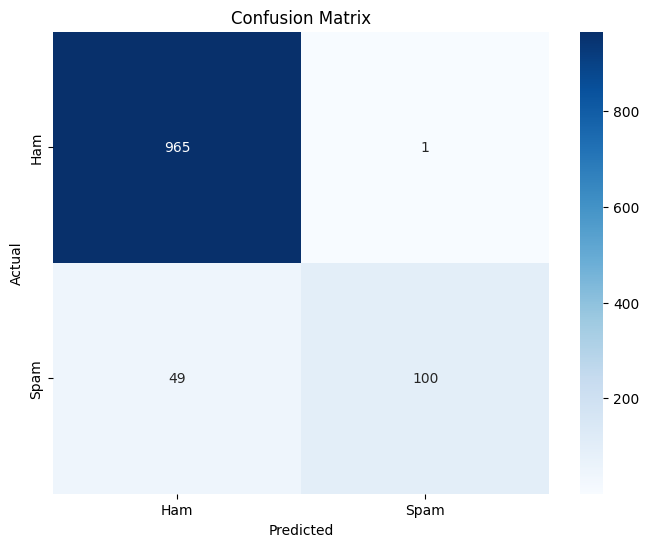

In [40]:
# Visualizing the confusion matrix
import seaborn as sns
conf_matrix = confusion_matrix(y_test['spam'], y_pred)
plt.figure(figsize=(8, 6))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Ham', 'Spam'], yticklabels=['Ham', 'Spam'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Email Spam  _Ham_  DETECT  using  TF and IDF model

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Using TfidfVectorizer for feature extraction
tv = TfidfVectorizer(max_features=2500, ngram_range=(1, 2))

In [44]:
x = tfidf.fit_transform(corpus).toarray()  # Convert to array for further processing

In [45]:
x

array([[0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, ..., 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000],
       [0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000, 0.000

In [49]:
# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y.iloc[:,1].values, test_size=0.2, random_state=42)

# Using  Naive Bayes for classification
from sklearn.naive_bayes import MultinomialNB

spam_tfidf_model = MultinomialNB().fit(x_train, y_train)

In [51]:
# prediction 

y_pred = spam_tfidf_model.predict(x_test)

# performance metrics

In [ ]:
print("Accuracy:", accuracy_score(y_test['spam'], y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test['spam'], y_pred))
print("Classification Report:\n", classification_report(y_test['spam'], y_pred))

Accuracy: 0.9820627802690582
Confusion Matrix:
 [[965   1]
 [ 19 130]]
Classification Report:
               precision    recall  f1-score   support

       False       0.98      1.00      0.99       966
        True       0.99      0.87      0.93       149

    accuracy                           0.98      1115
   macro avg       0.99      0.94      0.96      1115
weighted avg       0.98      0.98      0.98      1115



# 1 - preprocessing and cleaning the data

 # 2 - BOW and TF-IDF vectorization
 # 3 - train test split
 # 4 - model training and evaluation

# 1 - preprocessing and cleaning the data

 # 2 - train test split 

 # 3 - BOW and TF-IDF vectorization

 # 4 - model training and evaluation

we do train test split in 2nd step to prevent from leakage 

and 

before train and test data is quite similar 

creating bag of words

In [62]:
corpus

['go jurong point crazi avail bugi n great world la e buffet cine got amor wat',
 'ok lar joke wif u oni',
 'free entri wkli comp win fa cup final tkt st may text fa receiv entri question std txt rate c appli',
 'u dun say earli hor u c alreadi say',
 'nah think goe usf live around though',
 'freemsg hey darl week word back like fun still tb ok xxx std chg send rcv',
 'even brother like speak treat like aid patent',
 'per request mell mell oru minnaminungint nurungu vettam set callertun caller press copi friend callertun',
 'winner valu network custom select receivea prize reward claim call claim code kl valid hour',
 'mobil month u r entitl updat latest colour mobil camera free call mobil updat co free',
 'gonna home soon want talk stuff anymor tonight k cri enough today',
 'six chanc win cash pound txt csh send cost p day day tsandc appli repli hl info',
 'urgent week free membership prize jackpot txt word claim c www dbuk net lccltd pobox ldnw rw',
 'search right word thank breather

In [71]:

# # Vectorize the corpus
# vectorizer = TfidfVectorizer(max_features=2500, ngram_range=(1, 2))
# X = vectorizer.fit_transform(corpus).toarray()

# train test split
x_train, x_test, y_train, y_test = train_test_split(corpus, y, test_size=0.2, random_state=42)

# Using Naive Bayes for classification
from sklearn.naive_bayes import MultinomialNB

spam_tfidf_model = MultinomialNB().fit(x_train, y_train)

ValueError: Expected 2D array, got 1D array instead:
array=['repli win weekli fifa world cup held send stop end servic' 'hello sort town alreadi dont rush home eat nacho let know eta' 'come guoyang go n tell u told' 'hey sathya till dint meet even singl time saw situat sathya' 'orang bring rington time chart hero free hit week go rington pic wap stop receiv tip repli stop' 'sit mu wait everyon get suit take shower' 'finish liao u' 'urgent mobil award bonu caller prize nd attempt contact call box qu' 'probabl still go stuff' 'wah lucki man save money hee' 'hey u still gym' 'oh lk tt den take e one tt end cine lor dun wan yogasana oso' 'ok lor' 'still havent collect dough pl let know go place sent get control number' 'stupid possibl' 'u secret admir reveal think u r special call opt repli reveal stop per msg recd cust care' 'amaz rearrang letter give mean dormitori dirti room astronom moon starer eye see elect result lie let recount mother law woman hitler eleven plu two twelv plu one amaz' 'call listen extrem dirti live chat go offic right total privaci one know sic listen p min mp' 'never want tell short edg late' 'wil reach' 'oh yeah diet flew window' 'oh shit thought trip loooooool make much sens grin sofa refer sleep couch link sent went trip oh babe go celebr rent' 'send greet joy happi gr even' 'armand say get ass epsilon' 'aiyah u ok alreadi lar e nydc wheellock' 'know watch film comput' 'heard abt tat' 'oop sorri check mind pick tomo half eight station would ok' 'anytim lor' 'friendship poem dear dear u r near hear dont get fear live cheer tear u r alway dear gud ni' ... 'k da mani page want' 'aight fuck get later' 'messag brought gmw ltd connect' 'u get pic msg phone' 'want get laid tonight want real dog locat sent direct ur mob join uk largest dog network txting moan nyt ec p msg p' 'tell pa pain de' 'awesom gonna soon later tonight' '' 'free msg bill mobil number mistak shortcod pleas call charg refund call free bt landlin' 'tri someth dear read someth exam' 'much bad avoid like' 'vote wherev heart guid' 'k k go tirunelvali week see uncl alreadi spend amount take dress want money give feb' 'realli dun bluff leh u sleep earli nite' 'first gain lt gt kg sinc took second done blood sugar test ok blood pressur within normal limit worri' 'cant pick phone right pl send messag' 'want bold bb torch' 'k k much cost' 'thank chikku gud nyt' 'mah b pick tomorrow' 'board work fine issu overh also reslov still softwar inst pend come around clock' 'saw messag k da' 'garbag bag egg jam bread hannaford wheat chex' 'great princess love give receiv oral doggi style fave posit enjoy make love lt gt time per night' 'lord ring return king store repli lotr june chanc win lotr soundtrack cd stdtxtrate repli stop end txt' 'hi wlcome back wonder got eaten lion someth noth much' 'sorri call later' 'prabha soryda reali frm heart sori' 'nt joke serious told' 'say somebodi name tampa'].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.